Things to do
*). Read aout fit&transform
*). Read  Mean & Std
*). https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7 Read about apply
*). Read about scale
*). https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15 for EDA article MEDIUM
*). Refer other Titanic EDA notebooks
*). 


Reference links :
https://towardsdatascience.com/practical-machine-learning-basics-5d81a22f188

https://www.kaggle.com/morihosseini/comprehensive-exploratory-data-analysis-of-titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [2]:
#read data
train = pd.read_csv(r'D:\datasets\Titianic\train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


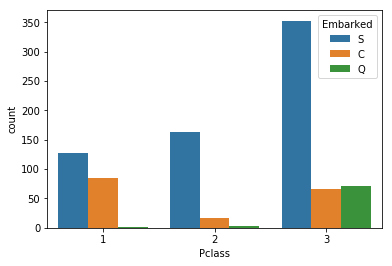

In [3]:
#City distribution among travel class
sns.countplot(hue=train['Embarked'],x = train['Pclass'])

In [4]:
#to plot a barplot, need to get such data
trainGroupBySeries = train.groupby([train['Embarked'],train['Pclass']]).size()
trainGroupByDF = trainGroupBySeries.to_frame()
trainGroupByDF.reset_index(inplace=True)

trainGroupByDF

,Embarked,Pclass,0
0,C,1,85
1,C,2,17
2,C,3,66
3,Q,1,2
4,Q,2,3
5,Q,3,72
6,S,1,127
7,S,2,164
8,S,3,353


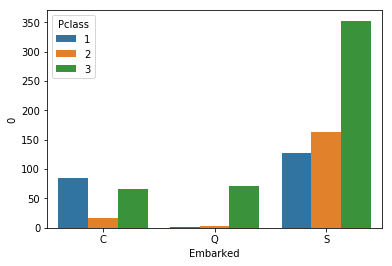

In [5]:
sns.barplot(x = "Embarked",y =0, hue = "Pclass",data=trainGroupByDF)

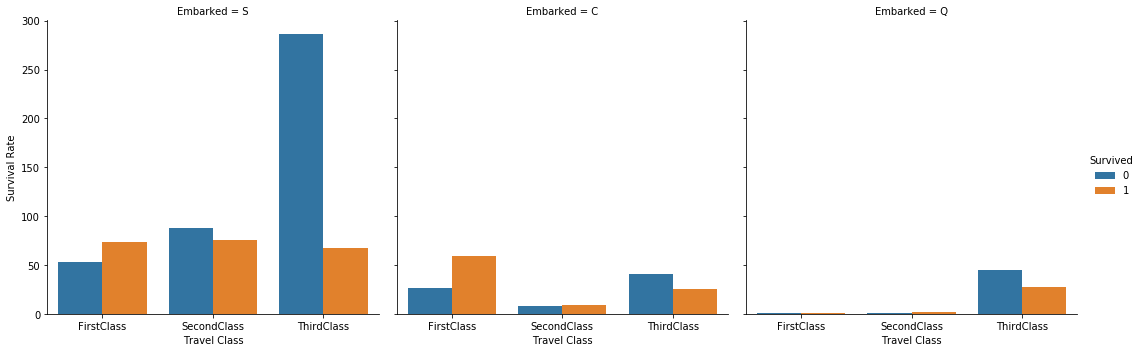

In [6]:
#plotting 3 ie. more than 2 categories in countplot
#Survival distribution based on travel class of all cities
g = sns.catplot(x="Pclass",data = train, col = "Embarked", hue = "Survived", kind="count")
g.set_axis_labels("Travel Class", "Survival Rate").set_xticklabels(["FirstClass", "SecondClass", "ThirdClass"])


C:\Users\Anuj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


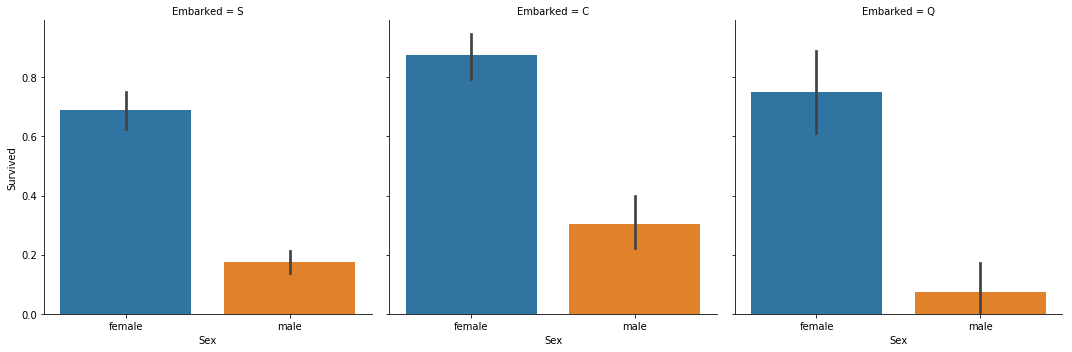

In [7]:
#Survival rate based on gender of all ports/cities
h = sns.catplot(x="Sex",y = "Survived",data = train, col = "Embarked", kind="bar", order=["female","male"])
#h.set_axis_labels("Travel Class", "Survival Rate").set_xticklabels(["FirstClass", "SecondClass", "ThirdClass"])


C:\Users\Anuj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


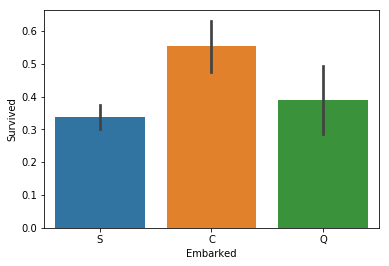

In [8]:
#which port people survived more in terms of survival rate(1)
sns.barplot(x="Embarked", y="Survived", data = train)

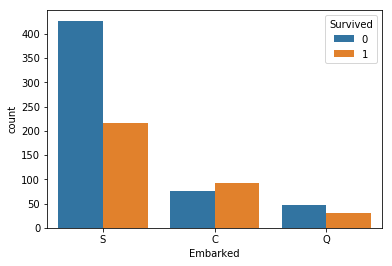

In [9]:
#which port people survived more(2)
sns.countplot(x="Embarked",hue = "Survived",data=train)

In [10]:
#What age group existed in all ports cities
s = train[['Age','Embarked']]
s = s[s.Age.notnull()]
s.head(3)

,Age,Embarked
0,22.0,S
1,38.0,C
2,26.0,S


In [11]:
#What age group existed in all ports cities
s['AgeG']=pd.cut(s.Age,bins=[0,20, 59, 100], labels=['Young', 'MidAge', 'Old'])
s.head(3)

,Age,Embarked,AgeG
0,22.0,S,MidAge
1,38.0,C,MidAge
2,26.0,S,MidAge


In [12]:
#What age group existed in all ports cities
s.loc[s.Age<21,"AgeGroup"]="Young"
s.loc[((s.Age>20) & (s.Age <60)),"AgeGroup"]="MidAge"
s.loc[s.Age>=60,"AgeGroup"]="Old"
s.head(3)


,Age,Embarked,AgeG,AgeGroup
0,22.0,S,MidAge,MidAge
1,38.0,C,MidAge,MidAge
2,26.0,S,MidAge,MidAge


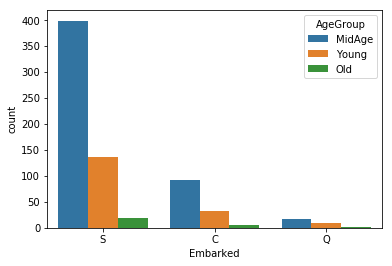

In [13]:
#What age group existed in all ports cities
sns.countplot(x = 'Embarked', hue = 'AgeGroup', data=s)

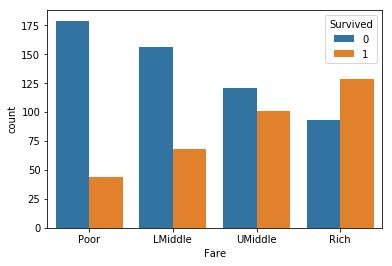

In [87]:
FareGroupDF = train.copy()
FareGroupDF['Fare'] = pd.qcut(FareGroupDF.Fare, q=4, labels=['Poor', 'LMiddle','UMiddle', 'Rich'])
FareGroupDF['Fare'].value_counts()
sns.countplot(data=FareGroupDF, x='Fare', hue='Survived')

In [14]:
#group by Embarked and SibSp in which len column give count of each type of SibSp present in the particular Embarked 
#And sum column gives sum of each type of SibSp present in each Embarked
s4 = train.groupby(["Embarked", "SibSp"]).SibSp.agg([len, sum])
s4

len  sum
Embarked SibSp          
C        0      109    0
         1       53   53
         2        6   12
Q        0       59    0
         1       11   11
         2        3    6
         4        4   16
S        0      438    0
         1      145  145
         2       19   38
         3       16   48
         4       14   56
         5        5   25
         8        7   56

In [15]:
#gives value_counts of Embarked ie. count of rows having "C" are 168
train.head(3)
s1 = train[["Embarked","SibSp"]]
s1.groupby(["Embarked"]).count()

,SibSp
Embarked,
C,168
Q,77
S,644


In [16]:
#gives the sum of all kinds of SibSp present in each embarked 
#ie. For C => SibSp of 0 type having count 109 will sum up to (109*0)=0
#For C => SibSp of 1 type having count 53 will sum up to (53*1)=53
#For C => SibSp of 2 type having count 6 will sum up to (6*2)=12
#total sum of SibSp types in C => 0 + 53 + 12 = 65
#likewise in other Embarked
#this gives the total sum in the column of all the types of SibSP in particular embarked as we do not have group by with SibSp
s2 = train[["Embarked","SibSp"]]
s2 = s2.groupby(["Embarked"]).SibSp.agg([sum])
s2 = s2.reset_index()
s2 = s2.set_index("Embarked")
#to perform join operation in coming steps the column name needs to be different with the other dataframe column to be joined 
#for join operation the index of both dataframes should be same which can be done by set_index
s2 = s2.rename(columns={"sum":"SibSpSum"})
s2

,SibSpSum
Embarked,
C,65
Q,33
S,368


In [17]:
#Similarily for Parch as of SibSp
s5 = train[["Embarked", "Parch"]]
s5 = s5.groupby(["Embarked"]).Parch.agg([sum])
s5 = s5.reset_index()
s5 = s5.set_index("Embarked")
s5 = s5.rename(columns={"sum":"ParchSum"})
s5

,ParchSum
Embarked,
C,61
Q,13
S,266


In [18]:
s6 = s2.join(s5,on='Embarked',how='outer')
s6=s6.reset_index()
s6

,Embarked,SibSpSum,ParchSum
0,C,65,61
1,Q,33,13
2,S,368,266


To plot above df such that x axis has Embarked with both columns(SibSpSum & ParchSum) on each embarked.
Need to bring SibSpSum & ParchSum into a single column so that these two columns can be treated as hue in plotting
using melt this got possible as below

In [19]:
s7 = s6.melt('Embarked',var_name='cols',value_name='vals')
s7

,Embarked,cols,vals
0,C,SibSpSum,65
1,Q,SibSpSum,33
2,S,SibSpSum,368
3,C,ParchSum,61
4,Q,ParchSum,13
5,S,ParchSum,266


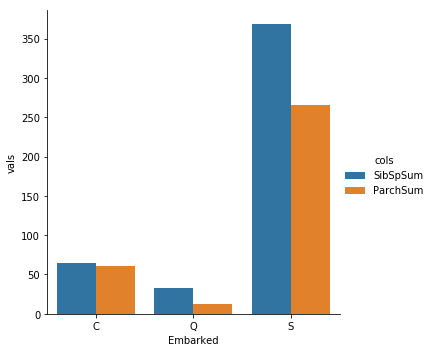

In [20]:
sns.catplot(x="Embarked",y="vals", hue="cols", data = s7, kind="bar")

In [21]:
#Q. get count of travellers who are with SibSP and parch for every city / port/ embarked

#This gets the count of people like
# Port C, People came with 0 SibSp => 109
# Port C, People came with 1 SibSp => 53
a = train.groupby(["Embarked","SibSp"]).SibSp.agg([len])
a

len
Embarked SibSp     
C        0      109
         1       53
         2        6
Q        0       59
         1       11
         2        3
         4        4
S        0      438
         1      145
         2       19
         3       16
         4       14
         5        5
         8        7

In [22]:
#This gets the count who were with atleast 1 SibSp
b = a.reset_index()
filter1 = b["SibSp"] > 0
c = b[filter1]
c

,Embarked,SibSp,len
1,C,1,53
2,C,2,6
4,Q,1,11
5,Q,2,3
6,Q,4,4
8,S,1,145
9,S,2,19
10,S,3,16
11,S,4,14
12,S,5,5


In [23]:
#total count of people coming with atleast 1 SibSp
e = c.len.agg([sum])
e

sum    283
Name: len, dtype: int64

In [24]:
#Port wise count of people coming with atleast 1 SIbSp
d = c.groupby(["Embarked"]).len.sum()
d = d.to_frame()
d = d.reset_index()
d

,Embarked,len
0,C,59
1,Q,18
2,S,206


In [25]:
#All above lines done in 1 line
g = train.groupby(["Embarked"]).apply(lambda x:x.loc[(x['SibSp']>0),["SibSp"]]).groupby("Embarked").SibSp.agg([len]).reset_index()
g

,Embarked,len
0,C,59
1,Q,18
2,S,206


In [26]:
#Port wise count of people coming with atleast 1 Parch
f = train.groupby("Embarked").apply(lambda df : df.loc[(df['Parch']>0),['Parch']]).groupby("Embarked").Parch.agg([len]).reset_index()
f

,Embarked,len
0,C,45
1,Q,8
2,S,160


In [27]:
g = g.rename(columns={"len":"SibSpLen"})
g = g.set_index("Embarked")

In [28]:
f = f.rename(columns={"len":"ParchLen"})
f = f.set_index("Embarked")

In [29]:
h = g.join(f,how="outer",on="Embarked")
h = h.reset_index()
h

,Embarked,SibSpLen,ParchLen
0,C,59,45
1,Q,18,8
2,S,206,160


In [30]:
h = h.melt('Embarked',var_name='cols',value_name='vals')
h

,Embarked,cols,vals
0,C,SibSpLen,59
1,Q,SibSpLen,18
2,S,SibSpLen,206
3,C,ParchLen,45
4,Q,ParchLen,8
5,S,ParchLen,160


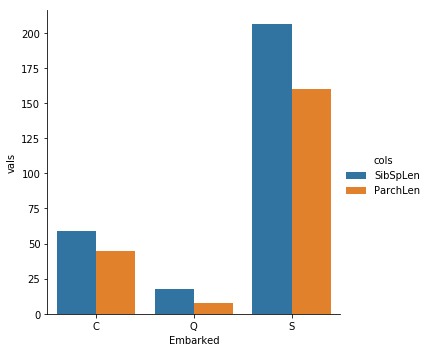

In [31]:
#count of people travelling with atleast 1 SibSp or atleast 1 Parch
sns.catplot(x="Embarked",y = "vals", hue="cols", data = h, kind="bar")

In [32]:
#correlation matrix
#how each column is related with other
corr_matrix = train.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


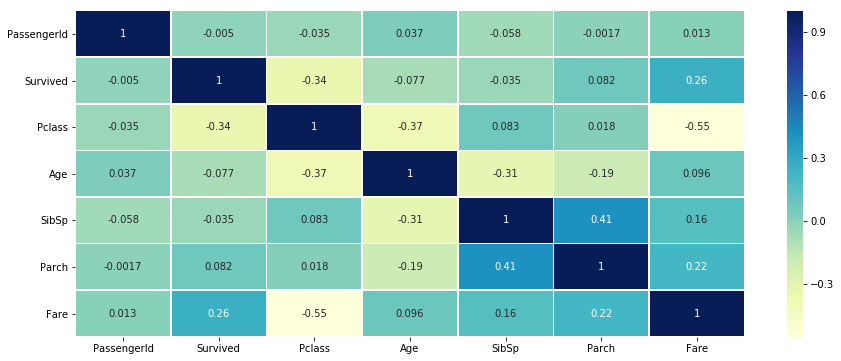

In [33]:
#heat map of visulaizing correlation matrix
plt.figure(figsize=(15,6))
sns.heatmap(data=corr_matrix, cmap="YlGnBu", annot =True, linewidths=0.5)

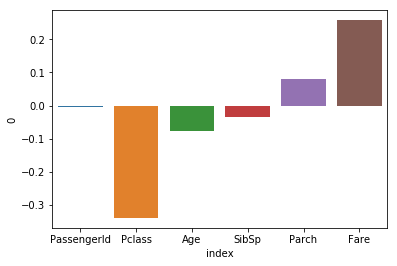

In [34]:
#compare correlate correlation of dataframe with other column / series or dataframe
#Makes sense in corrrelation between features and target like target is "survived" and features are rest of columns 
df = train.drop("Survived" , axis=1).corrwith(train.Survived)
df = df.to_frame()
df = df.reset_index()
s = df.columns
s
df = df.set_index("index")
df
            
sns.barplot(x = df.index, y=df[0])

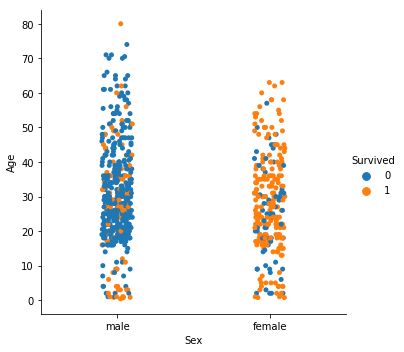

In [35]:
sns.catplot(data=train, x = "Sex", y = "Age",hue="Survived")

In [36]:
#Using lambda apply, split names to fetch firstname from every row
train["FirstName"] = train.Name.apply(lambda x:x.split(",")[1])
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer)


Step1 : First determine whether it s classfication problem or regression problem

Step2 : Select appropriate algo which comes under above selected problem

Step3 : Prepare training model
i). Load data
ii). Check each column and check what kind of data it contains
iii). Remove and fill missing values
iv). The introduction of a new feature in the data by using domain knowledge is called Feature engineering.
titanic[‘Deck’] = titanic[‘Cabin’].str[:1]
To get the floor of titanic / for eg. Names column has many other representations of Miss like madame, Ms so have to club it in one category 
iii). Convert text values to numerical values (Encoding)
iv). Select relevant features using correlation
 Strong correlation between two features, which is shown by values close to +1 or -1, means there is redundancy in data, therefore one of the features can be dropped.
v). 
vi). Feature Selection - Dropping unnecessary columns
like 
"Name" -> "Title",
"SibSp" and "Parch" -> "FamilySize",
"Ticket" -> drop,
"Cabin" -> "HasCabin".
so the columns having modified columns can be removed.whatever fruitful info we needed have been extracted to create new column
vii). Remove outliers,Outliers are extreme values that are outside what is expected and unlike the rest of the data.have to be careful with removing the outliers as you don’t know for sure that these values are indeed wrong. I try to build the machine learning model with and without the outliers and see if the model’s performance improves or deteriorates.
vii). feature scaling, Scale is a quick and easy way to scale the values in such a way that all features are centered around zero and have variance in the same order.

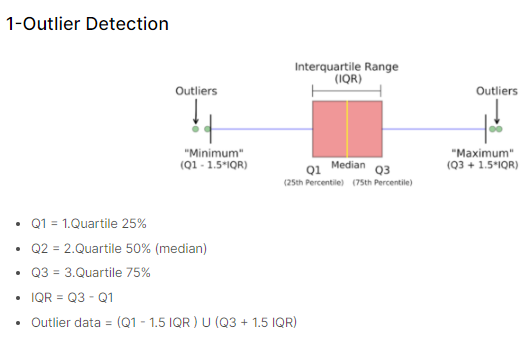


In [37]:
#Convert text values to numerical values

#Reason to convert all text to numberic :
#i). Calculate correlation between feilds
#ii). ML algos prefer working with numbers

#Using Label Encoding
print("Original :\n",train.Embarked.head(6))
#Covert to Category datatype for encode
#can use train['Embarked_Numeric'] in place of train_LE if want new column in existing df 
train_LE = train['Embarked'].astype('category')
#provides codes to category to convert to int datatype
train_LE = train_LE.cat.codes
print("\nUsing Label Encoding : \n",train_LE.head(6))
#using Label Encoding using sklearn
lb_make = LabelEncoder()
train_SKLearn_LE = train.copy()
train_SKLearn_LE['Embarked_Code'] = lb_make.fit_transform(train['Embarked'].astype(str))
print("\nUsing SKLearn Label Encoding\n",train_SKLearn_LE['Embarked_Code'].head(5))

#Using OneHotEncoding
train_OHE = pd.get_dummies(train, columns=["Embarked"])
print("\nUsing One Hot Encoding :\n",train_OHE.dtypes)
#Using one hot encoding using sklearn
lb = LabelBinarizer()
train_SKLearn_OHE = train.copy()
lb_results = lb.fit_transform(train_SKLearn_OHE['Embarked'].astype(str))
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
print("\nUsing SKLearn One Hot Encoding\n",lb_results_df.head(5))
#new DataFrame with only the one hot encodings, This needs to be concatenated back with the original DataFrame

#using np.where
train_where = train.copy()
train_where['S'] = np.where(train_where['Embarked'].str.contains('S'),1,0)
print("\nUsing Where :\n",train_where['S'].head(4))


Original :
 0    S
1    C
2    S
3    S
4    S
5    Q
Name: Embarked, dtype: object

Using Label Encoding : 
 0    2
1    0
2    2
3    2
4    2
5    1
dtype: int8

Using SKLearn Label Encoding
 0    2
1    0
2    2
3    2
4    2
Name: Embarked_Code, dtype: int64

Using One Hot Encoding :
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
FirstName       object
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

Using SKLearn One Hot Encoding
    C  Q  S  nan
0  0  0  1    0
1  1  0  0    0
2  0  0  1    0
3  0  0  1    0
4  0  0  1    0

Using Where :
 0    1
1    0
2    1
3    1
Name: S, dtype: int32


In [38]:
# Remove outliers
train_outliner = train.copy()
q_low = train_outliner['Age'].quantile(0.01)
q_high = train_outliner['Age'].quantile(0.99)
print(q_high)
train.loc[train['Age'] < 1]

65.87


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Master. Alden Gates
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Master. Hudson Trevor
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,Miss. Helene Barbara
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,Miss. Eugenie
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,Master. Viljo
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Master. Assad Alexander
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,Master. George Sibley
